In [6]:
import numpy as np
import matplotlib.pyplot as plt

In my first simulation I was reaching to the following plot.
I was expecting to see some kind of equbilirum, but with p!=0, in all of the cases the population of one group was dying out. You can see this in the following graph.

But this was not the thing I was expecting. On the other hand I wrote down the stochastic differential equations of the problem (very similar to the differential equations of the opening and closing gates in the integration and fire model of neuron).

When I simuled that, I saw the exact effect that I was predicting (some kind of equbilirum in the populations). So I pondered what is the problem. The problem was in the monte carlo simulation, I was setting the values of P_at and P_deat equal to one. P_at is the probability that the state is on atteched form, and P_deat is the probability that the system is in deattached form.

In [114]:
p = 0.55
N_at = 100
N_deat = 100
N_at_list = []
N_deat_list = []
for i in range(5000):
    rand = np.random.random()
    if rand <=p:
        if N_at == 0:
            continue
        N_at -= 1
        N_deat += 1
    else:
        if N_deat == 0:
            continue
        N_at += 1
        N_deat -= 1
    
    N_at_list.append(N_at)
    N_deat_list.append(N_deat)

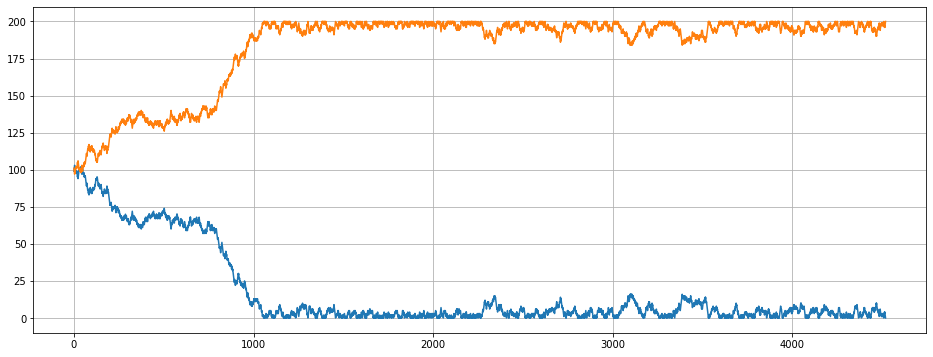

In [115]:
plt.figure(figsize=(16,6))
plt.plot(N_at_list)
plt.plot(N_deat_list)
plt.grid()

# Solving the rate equation

## The correct equation

In [117]:
N_total = 200
N_at = (N_total/2)
N_deat = (N_total/2)
N_atList = []
N_deatList = []

p = 0.55

for i in range(5000):
    P_at = N_at/N_total
    P_deat = N_deat/N_total
    
    dN_at = -P_at*(1-p)+P_deat*(p)
    dN_deat = -dN_at
    
    N_at_aux = N_at + dN_at
    N_deat_aux = N_deat + dN_deat
    
    if N_at_aux <0 or N_deat_aux <0:
        N_atList.append(N_at)
        N_deatList.append(N_deat)
        continue
        
    else:
        N_at = N_at_aux
        N_deat = N_deat_aux
        N_atList.append(N_at)
        N_deatList.append(N_deat)
        


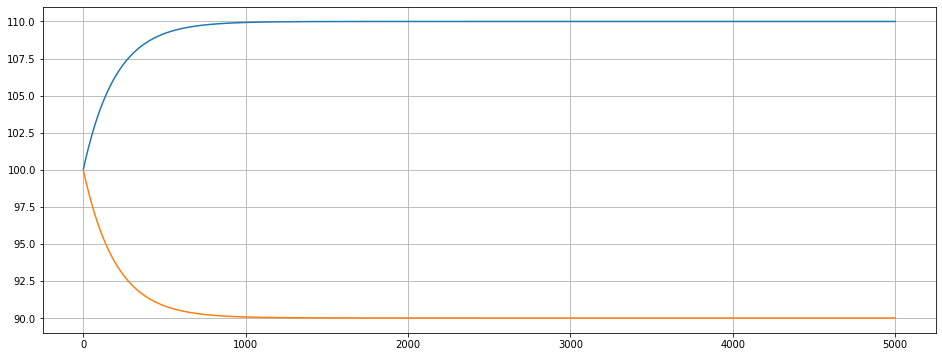

In [118]:
plt.figure(figsize=(16,6))
plt.plot(N_atList)
plt.plot(N_deatList)
plt.grid()

## The equation that corresponds to the wrong monte carlo simulation

In [119]:
N_total = 200
N_at = (N_total/2)
N_deat = (N_total/2)
N_atList = []
N_deatList = []

p = 0.55

for i in range(5000):
    P_at = 1
    P_deat = 1
    
    dN_at = -P_at*(1-p)+P_deat*(p)
    dN_deat = -dN_at
    
    N_at_aux = N_at + dN_at
    N_deat_aux = N_deat + dN_deat
    
    if N_at_aux <0 or N_deat_aux <0:
        N_atList.append(N_at)
        N_deatList.append(N_deat)
        continue
        
    else:
        N_at = N_at_aux
        N_deat = N_deat_aux
        N_atList.append(N_at)
        N_deatList.append(N_deat)
        

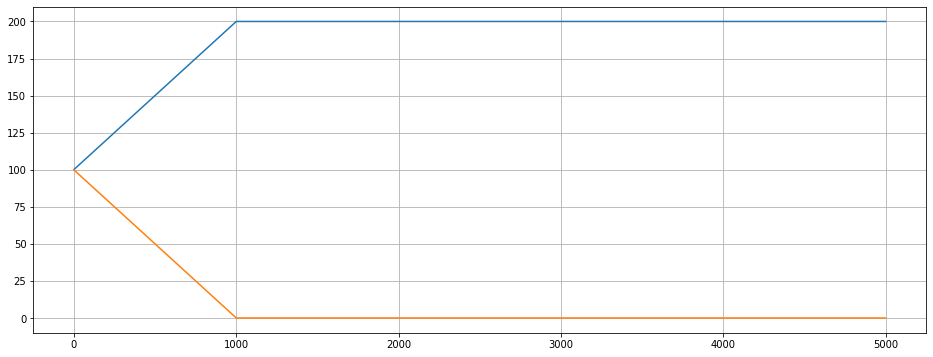

In [120]:
plt.figure(figsize=(16,6))
plt.plot(N_atList)
plt.plot(N_deatList)
plt.grid()

## Correcting the monte carlo simulation

In [195]:
def Monte_run(ens):
    N_atList = np.zeros(1000)
    N_deatList = np.zeros(1000)
    for j in range(ens):
        p = 0.8
        N_at = 100
        N_deat = 100
        N_total = N_at + N_deat
        N_atList_monte = []
        N_deatList_monte = []
        for i in range(5000):
            rand_selection = np.random.random()
            P_at = N_at/N_total
            P_deat = N_deat/N_total
            if rand_selection < P_at:
                rand = np.random.random()
                if rand < 1-p:
                    N_deat += 1
                    N_at -= 1
                    N_atList_monte.append(N_at)
                    N_deatList_monte.append(N_deat)
            else:
                rand = np.random.random()
                if rand < p:
                    N_deat -= 1
                    N_at += 1
                    N_atList_monte.append(N_at)
                    N_deatList_monte.append(N_deat)
        
        N_atList += np.array(N_atList_monte[:1000])/ens
        N_deatList += np.array(N_deatList_monte[:1000])/ens
    
    return N_atList, N_deatList
        

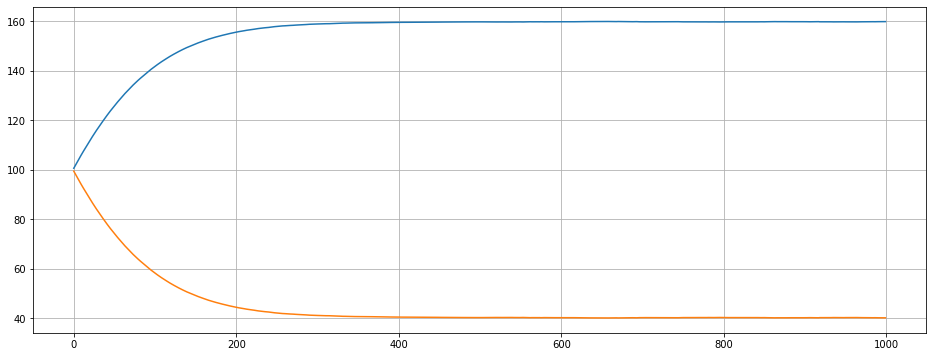

In [247]:
N_atList_monte, N_deatList_monte = Monte_run(10000)
plt.figure(figsize=(16,6))
plt.plot(N_atList_monte)
plt.plot(N_deatList_monte)
plt.grid()

In [297]:
N_total = 200
N_at = (N_total/2)
N_deat = (N_total/2)
N_atList = []
N_deatList = []

p = 0.8

for i in range(1000):
    P_at = N_at/N_total
    P_deat = N_deat/N_total
    
    dN_at = -P_at*(1-p)+P_deat*(p)
    dN_deat = -dN_at
    
    N_at_aux = N_at + dN_at
    N_deat_aux = N_deat + dN_deat
    
    if N_at_aux <0 or N_deat_aux <0:
        N_atList.append(N_at)
        N_deatList.append(N_deat)
        continue
        
    else:
        N_at = N_at_aux
        N_deat = N_deat_aux
        N_atList.append(N_at)
        N_deatList.append(N_deat)
        

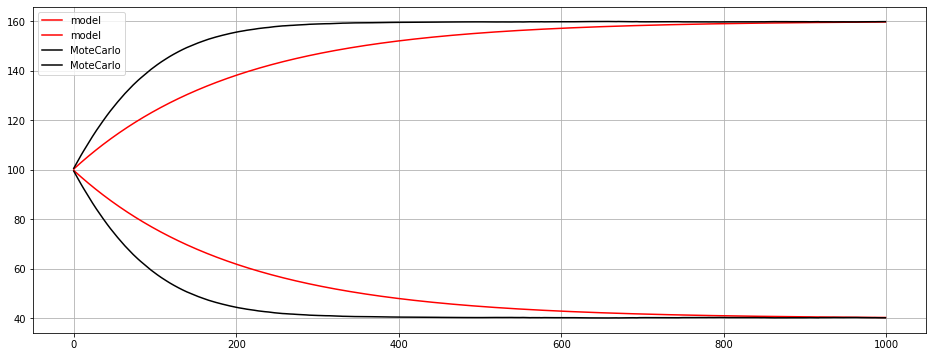

In [298]:
plt.figure(figsize=(16,6))
plt.plot(N_atList, c='red', label="model")
plt.plot(N_deatList, c='red', label='model')
plt.plot(N_atList_monte, c='k', label="MoteCarlo")
plt.plot(N_deatList_monte, c='k', label="MoteCarlo")
plt.grid()
plt.legend()

Although the value that two simulated models (monte carlo and exact) are reach at their limit is same, but their curvature and neck is not same looking. After a little bit of thinking, I found out that is because the increase/decrease step in the population is not the same for monte carlo and differential equaiton.
In the monte carlo this step size is +-1 but in the case of differential equation it is dN_at.
So I just need to scale that step size. After a little bit of calculation and try and error I found out that the value of scaling in the step size is 2.4. So le't recalculate the results of the differential equation with scaled step size:


In [299]:
N_total = 200
N_at = (N_total/2)
N_deat = (N_total/2)
N_atList = []
N_deatList = []

p = 0.8

for i in range(1000):
    P_at = N_at/N_total
    P_deat = N_deat/N_total
    
    dN_at = -P_at*(1-p)+P_deat*(p)
    dN_deat = -dN_at
    
    N_at_aux = N_at + dN_at*2.4
    N_deat_aux = N_deat + dN_deat*2.4
    
    if N_at_aux <0 or N_deat_aux <0:
        N_atList.append(N_at)
        N_deatList.append(N_deat)
        continue
        
    else:
        N_at = N_at_aux
        N_deat = N_deat_aux
        N_atList.append(N_at)
        N_deatList.append(N_deat)
        

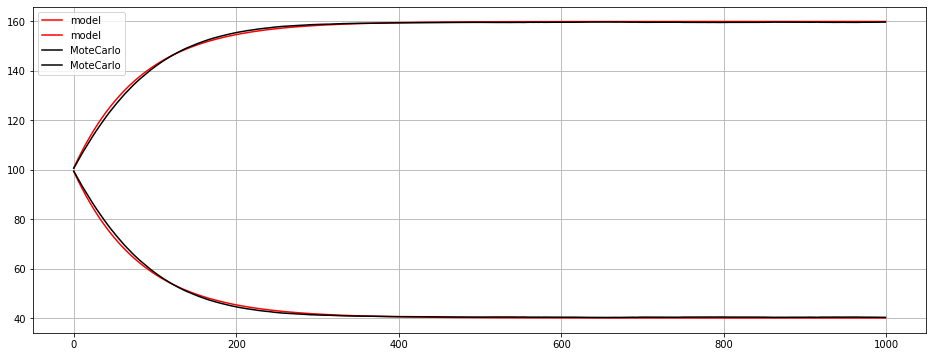

In [300]:
plt.figure(figsize=(16,6))
plt.plot(N_atList, c='red', label="model")
plt.plot(N_deatList, c='red', label='model')
plt.plot(N_atList_monte, c='k', label="MoteCarlo")
plt.plot(N_deatList_monte, c='k', label="MoteCarlo")
plt.grid()
plt.legend()

As you can see now, the two plots are mached in shape!

In [217]:
a = np.array([1,2,3])

In [218]:
np.roll(a,-1)

array([2, 3, 1])